# Importing library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement-dataset.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Exploratory Data Analysis

In [4]:
# Checking if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [6]:
df.shape

(100, 4)

In [7]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [9]:
print(df.duplicated().sum())

0


In [10]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


<Axes: >

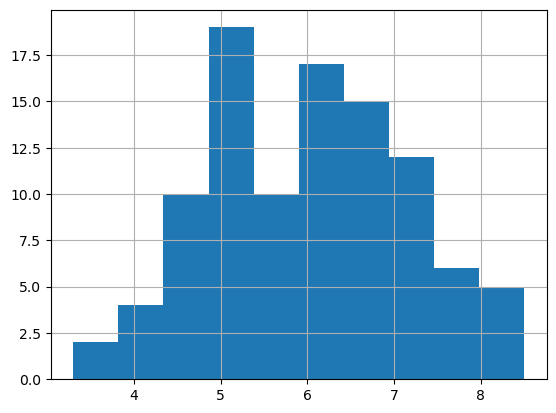

In [12]:
# Histogram shows the weigntage of each value in the chosen column
df['cgpa'].hist(bins=10)

<Axes: xlabel='placement', ylabel='cgpa'>

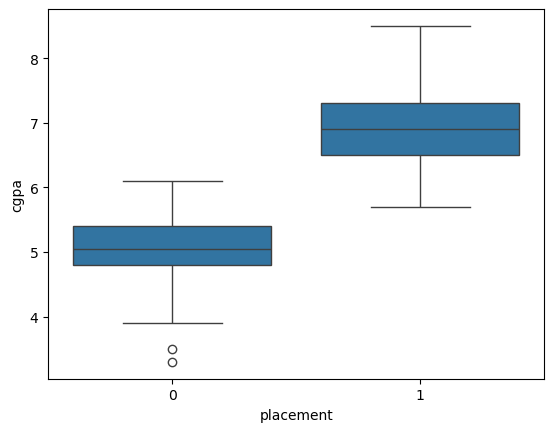

In [16]:
# Boxplot: show max, min and median
sns.boxplot(x='placement',y='cgpa',data=df)

<Axes: xlabel='cgpa', ylabel='iq'>

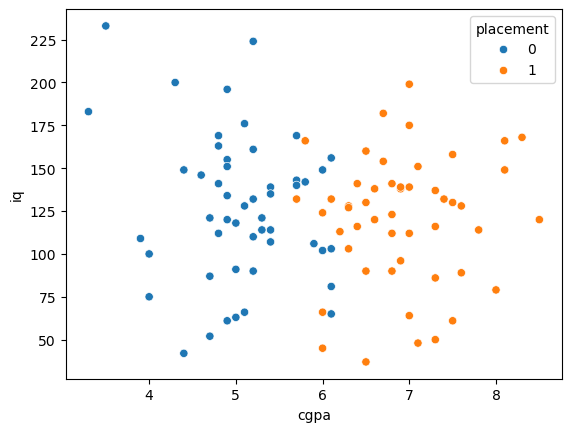

In [17]:
# Seaborn library used to plot dot graph in 1 d plain
sns.scatterplot(x='cgpa',y='iq',hue='placement', data =df)

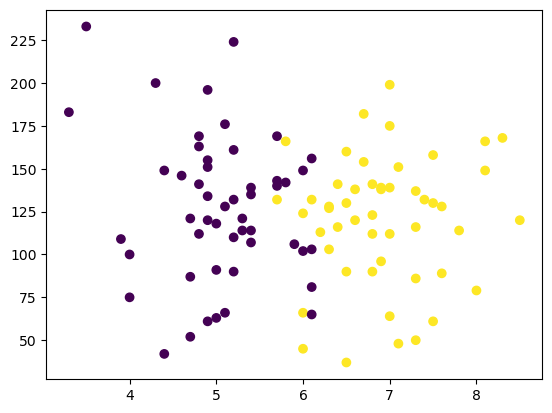

In [18]:
# Graph using matplotlib
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

<Axes: >

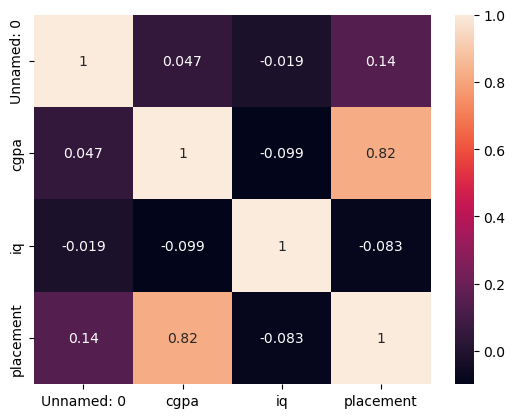

In [20]:
# Deals in mathmatical numeric reltion between two variables
corr = df.corr()
sns.heatmap(corr,annot=True)

<Axes: xlabel='placement', ylabel='count'>

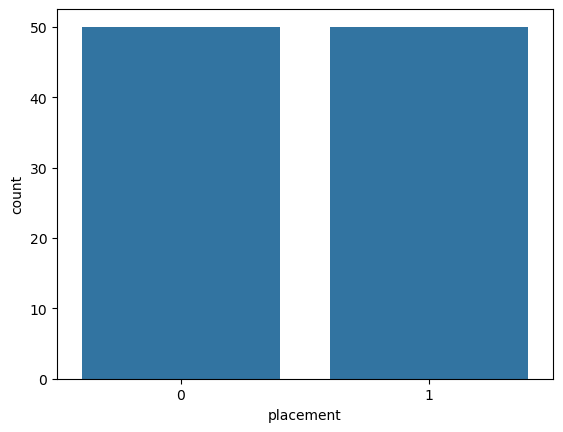

In [24]:
df['placement'].value_counts()
sns.countplot(x='placement', data=df)

# Preprocessing

In [25]:
# All row/ 1 to all column (we are removing the extra column)
df = df.iloc[:,1:]

In [26]:
# Delete row with null values
df_clean = df.dropna(axis=0)

In [27]:
# Delete columns with null values
df_clean = df.dropna(axis=1)

In [28]:
# Replace null values with mean
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())
df['iq'] = df['iq'].fillna(df['iq'].mean())

In [29]:
# Remove dduplicate values
df = df.drop_duplicates()

# Data Processing

APPLICATION OF STANDARD SCALLER AND DATA ENCODING FOR ALPHABITAL/NUMERICAL VALUES

In [32]:
#used when values are not in scalable ratio
#StandardScaler → subtract mean, divide by standard deviation (Z-score normalization)
#MinMaxScaler → scales values to [0,1] 0 se leke 1 tak

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['cgpa','iq']] = scaler.fit_transform(df[['cgpa','iq']])

In [33]:
#used when values are in alphabatic form not in numbers form

#df_encoded = pd.get_dummies(df, columns=['placement'])
#print(df_encoded)

# Defining input and output

In [34]:
# Seperating input and output
X = df[['cgpa','iq']]
y = df['placement']

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
# Spliting into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
lor= LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred = lor.predict(X_test)

# Evaluation and testing the model

For Classification Models

(When target/output is categorical, e.g., Pass/Fail, Spam/Not Spam, Disease/No Disease)

Basic Metrics

Accuracy → % of total correct predictions.

Error Rate → 1 – Accuracy.

Confusion-Matrix-Based Metrics

Precision → Out of predicted positives, how many were correct.

Recall (Sensitivity/TPR) → Out of actual positives, how many were predicted correctly.

Specificity (TNR) → Out of actual negatives, how many were predicted correctly.

F1 Score → Harmonic mean of Precision & Recall.

Balanced Accuracy → Accounts for imbalanced datasets.

Matthews Correlation Coefficient (MCC) → Good for imbalanced datasets, ranges from -1 to +1.

Cohen’s Kappa → Compares model accuracy with random chance.

Threshold & Probability Based

ROC Curve & AUC (Area Under Curve) → How well the model separates classes.

Precision-Recall Curve → Useful when classes are highly imbalanced.

Log Loss (Cross-Entropy Loss) → Evaluates predicted probabilities instead of just labels.

Brier Score → Measures accuracy of probabilistic predictions.

In [47]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [48]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
18    0
30    1
73    0
33    0
90    1
4     0
76    0
77    1
12    0
31    0
Name: placement, dtype: int64

In [49]:
df.head()

,cgpa,iq,placement
0,0.710958,-0.014593,1
1,-0.079972,-0.442331,0
2,-0.607258,-0.064915,0
3,1.238245,0.211856,1
4,-0.167853,0.463466,0


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85

In [52]:
#mlxtend library to see the decision boundary or region or pattern

In [53]:
from mlxtend.plotting import plot_decision_regions

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

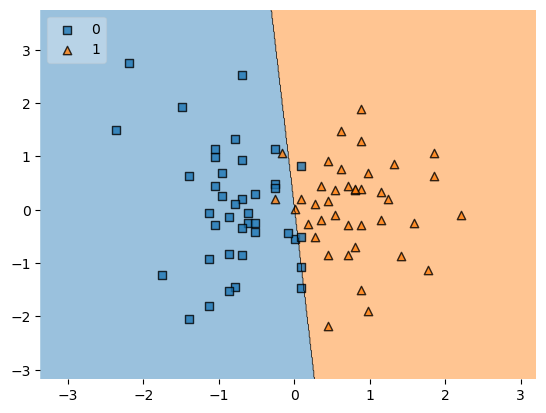

In [55]:
plot_decision_regions(X_train.values,y_train.values,clf=lor, legend=2)

# Deploye the model

In [56]:
import pickle

In [ ]:
pickle.dump(lor